# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q0.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?

A model is "linear" if it follows the format $ y = X \cdot b $ where y is the target value **vector** and X is the data **matrix** (of the features used to predict y) and b is the weight **vector** used to assign weights to each of the rows in the data matrix. Further, the equation can be expanded to be clearly shown as a linear combination: $ \hat{y} = \hat{x} \cdot b = \hat{x}_1 b_1  + \hat{x}_2 b_2  + ... + \hat{x}_K b_K $ where the role of b can be seen more clearly. 

2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)

The coefficient for a dummy/one-hot-encoded variable in a regression model represents the change in the target variable when the dummy variable is 1 (indicating presence of a certain category/class) versus when it is 0, assuming other variables remain constant.
This interpretation is affected by whether or not the model includes an intercept. If the model has an intercept (which it default does), the coefficient for each dummy variable represents the effect of that category relative to the baseline category. If the model does not have an intercept, each coefficient for the dummy variable represents the effect of that category in absolute terms, without comparison to a baseline.

3. Can linear regression be used for classification? Explain why, or why not.

Yes, but it is not optimal. Linear regression models combine and weight features in an optimal way to make predictions, predicting outcomes by predicting continuous outputs. However, linear regressions can be used for classification, where the line is predicting the probability of classification of one class where you can set a threshold (e.g., above 0.5 for one class and below for the other).

4. What are signs that your linear model is over-fitting?

One clear sign is if your linear model is performing very well (low RMSE error/high R^2 score) on your training set, but very poorly (high RMSE error/low R^2 score) on the test set, or data it hasn't seen before. Other signs include very high variance in model performance with small changes in the data.

5. Clearly explain multi-colinearity using the two-stage least squares technique.

Multicollinearity is when independent variables (columns of X) in a regression model are correlated. This makes it difficult to determine the individual effect of each independent variable on the dependent variable/$y$. 
Two-Stage Least Squares (2SLS) is a method used to address multicollinearity issues. In 2SLS, there are two steps:
- 1. Instead of using the problematic variable directly, we replace it with a new “stand-in” variable called an instrumental variable. This new variable is related to the original but isn’t influenced by the error. 
    - For example, if we’re dealing with an endogenous variable X like years of education and our outcome variable is income, we might find an instrumental variable like distance to the nearest school.
- 2. Now we run the regression again, using this stand-in variable instead of the problematic one. This allows us to avoid the overlap (multicollinearity) and focus on the real impact of each variable in the model.

6. What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$?

- Polynomial Features: Polynomial regression can model non-linear relationships by adding polynomial terms (e g., $x^2$, $x^3$, $x^4$, etc.) as new features in the model.
- Log/Exponential Features: Logarithmic (or the inverse, exponential) transformations may be useful when the relationship between x and y is exponential.

7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?
- The intercept is the expected value of the target variable when all predictor variables are zero. It represents the baseline level (the mean of the feature) in the absence of all other features/predictors.
- Each slope coefficient represents the expected change in y for a one-unit increase in the corresponding predictor variable, holding all other variables constant. This coefficient tells us how "good" of a predictor that feature. 
- This coefficient represents the difference in the target variable for the category indicated by the dummy variable (when it is 1) compared to the baseline category (typically the omitted category in one-hot encoding), holding other variables constant.

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [41]:
import numpy as np
import pandas as pd

df = pd.read_csv("data/Q1_clean.csv")

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.

                  Price                                                             
                  count        mean         std   min     25%    50%    75%      max
Neighbourhood                                                                       
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0    244.0
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   4500.0
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0  10000.0
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0    950.0
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   5000.0


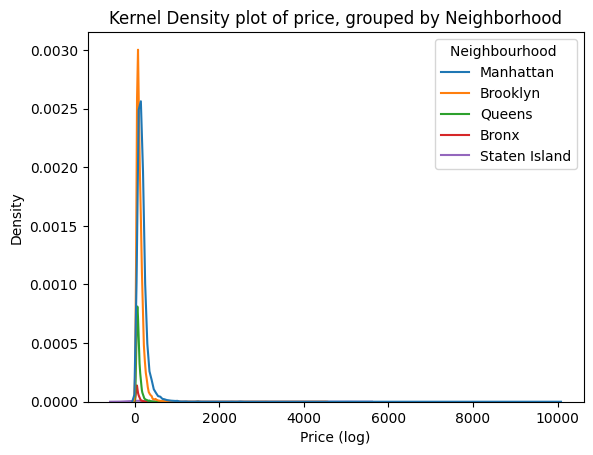

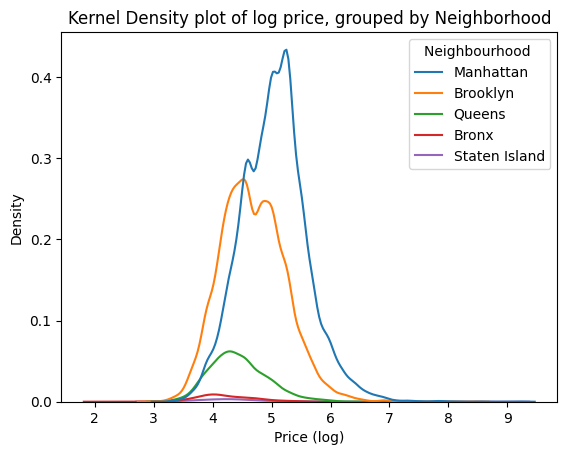

Manhattan is the most expensive bourough on average


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print(df[['Neighbourhood ', 'Price']].groupby('Neighbourhood ').describe().to_string())

sns.kdeplot(x=df['Price'], hue=df['Neighbourhood '])
plt.xlabel('Price (log)')
plt.ylabel('Density')
plt.title('Kernel Density plot of price, grouped by Neighborhood')
plt.show()

sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood '])
plt.xlabel('Price (log)')
plt.ylabel('Density')
plt.title('Kernel Density plot of log price, grouped by Neighborhood')
plt.show()

print("Manhattan is the most expensive bourough on average")


2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [43]:
y = df['Price']

X_d = pd.get_dummies(df['Neighbourhood '], dtype='int')

# Regression:
from sklearn.linear_model import LinearRegression # Import linear regression model

reg = LinearRegression(fit_intercept=False).fit(X_d, y) # Fit the linear model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
#print('R-squared: ', reg.score(X_d, y)) # R squared measure
print(results.to_string())
print("The coefficients in the regression are the same as the averages from the part 1 table for each Neighborhood.")
print("The coefficients/weights on one categorical variable defaults to the mean since we have no other variables.")
print("In other words, the mean solely drives the regression.")

R-squared:  0.04631389606035197
        variable  coefficient
0          Bronx    75.276498
1       Brooklyn   127.747378
2      Manhattan   183.664286
3         Queens    96.857233
4  Staten Island   146.166667
The coefficients in the regression are the same as the averages from the part 1 table for each Neighborhood.
The coefficients/weights on one categorical variable defaults to the mean since we have no other variables.
In other words, the mean solely drives the regression.


3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [44]:
y = df['Price']

X_d = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first=True)

# Regression:
from sklearn.linear_model import LinearRegression # Import linear regression model

reg = LinearRegression().fit(X_d, y) # Fit the linear model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
#print('R-squared: ', reg.score(X_d, y)) # R squared measure
print(results.to_string())
print(f"Intercept: {reg.intercept_}")
print("We handle the creation differently by including drop_first=True, basing the coefficients off the first variable (Bronx).")
print("The first category, the Bronx is dropped and becomes the reference coefficient for the other neighborhoods")

R-squared:  0.04631389606035208
        variable  coefficient
0       Brooklyn    52.470881
1      Manhattan   108.387789
2         Queens    21.580735
3  Staten Island    70.890169
Intercept: 75.27649769584607
We handle the creation differently by including drop_first=True, basing the coefficients off the first variable (Bronx).
The first category, the Bronx is dropped and becomes the reference coefficient for the other neighborhoods


In [32]:
print(f"Bronx is already represented by the intercept: {reg.intercept_}")
print("We can get the coefficients from these new coefficients by adding our reference variable back.")
print("This is done by adding the intercept.")
get_prev_results = pd.DataFrame({'variable':reg.feature_names_in_, 
                        'coefficient': reg.coef_+reg.intercept_}) # Regression coefficients
get_prev_results


Bronx is already represented by the intercept: 75.27649769584607
We can get the coefficients from these new coefficients by adding our reference variable back.
This is done by adding the intercept.


,variable,coefficient
0,Brooklyn,127.747378
1,Manhattan,183.664286
2,Queens,96.857233
3,Staten Island,146.166667


4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df['Price']
X = df[[ 'Neighbourhood ', 'Review Scores Rating' ]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) 

Z_train = pd.concat([X_train['Review Scores Rating'], 
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], 
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

reg = LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
print('R-squared: ', reg.score(Z_test,y_test)) 
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) 

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print(results.to_string())
print("The coefficient on Review Scores Rating is 1.032257")
print("The most expensive kind of property would be the Manhattan property with the highest Review Score Rating")


R-squared:  0.06701086106947296
RMSE:  125.01092061382933
               variable  coefficient
0  Review Scores Rating     1.032257
1                 Bronx   -17.261392
2              Brooklyn    32.180888
3             Manhattan    89.421020
4                Queens     4.050208
5         Staten Island    61.576393
The coefficient on Review Scores Rating is 1.032257
The most expensive kind of property would be the Manhattan property with the highest Review Score Rating


5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

y = df['Price']
X = df[[ 'Neighbourhood ', 'Review Scores Rating', 'Property Type' ]]

Z = pd.concat([X['Review Scores Rating'], 
        pd.get_dummies(X['Neighbourhood '], dtype='int'),
        pd.get_dummies(X['Property Type'], dtype='int')], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=100) 

reg = LinearRegression(fit_intercept=False).fit(X_train,y_train)

y_hat = reg.predict(X_test)
print('R-squared: ', reg.score(X_test,y_test)) 
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) 

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print(results.sort_values(by='coefficient').to_string())

print("The Coefficient of Review Scores Rating is 1.015839")
print("The most expensive property is a Manhattan Condominium with the highest review scores rating")

R-squared:  0.07515316986819853
RMSE:  124.46423255231858
                variable   coefficient
18            Lighthouse -9.182653e+01
22             Treehouse -7.111206e+01
15                  Dorm -5.219446e+01
12                Castle -4.333381e+01
7        Bed & Breakfast -3.382891e+01
13                Chalet -3.081069e+01
1                  Bronx -2.767276e+01
11             Camper/RV -1.587789e+01
6              Apartment -2.497177e+00
4                 Queens -3.734207e-01
17                   Hut -3.552714e-15
0   Review Scores Rating  1.015839e+00
2               Brooklyn  2.924260e+01
16                 House  3.064298e+01
10                 Cabin  3.144167e+01
20                 Other  3.232903e+01
23                 Villa  4.005421e+01
5          Staten Island  4.482572e+01
9               Bungalow  5.126009e+01
8                   Boat  6.445280e+01
19                  Loft  6.694127e+01
21             Townhouse  6.978604e+01
3              Manhattan  9.174987e+01
14    

6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

Part 4 Coefficient: 1.032257
Part 5 Coefficient: 1.015839
The coefficient for Review Scores Rating seems to slightly decrease as we include the Property Type variable. This would mean that the Reviews Scores Rating is less of a predictor when we included the Property Type variable than when our model was only using Neighborhood and Review Scores Rating as a predictor.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [35]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/cars_hw.csv")
#for item in list(df.select_dtypes(include=['object']).columns):
    #print(df[item].value_counts().to_string())

print("Categorical variables look good; possibly could change 'No_of_Owners' to numerical")
df.describe()
print("Mileage_Run and Price seem to have pretty large standard deviations")
#print(df['Mileage_Run'].describe().to_string(), '\n')
#print(np.log(df['Mileage_Run'].describe()).to_string(), '\n')
#print(np.arcsinh(df['Mileage_Run'].describe()).to_string(), '\n')

#print(df['Price'].describe().to_string(), '\n')
#print(np.log(df['Price'].describe()).to_string(), '\n')
#print(np.arcsinh(df['Price'].describe()).to_string(), '\n')

df['Mileage_Run'] = np.log(df['Mileage_Run'])
df['Price'] = np.log(df['Price'])
#df.describe()


Categorical variables look good; possibly could change 'No_of_Owners' to numerical
Mileage_Run and Price seem to have pretty large standard deviations


2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

count    976.000000
mean      13.411033
std        0.450276
min       12.144197
25%       13.072647
50%       13.409795
75%       13.691080
max       14.894260


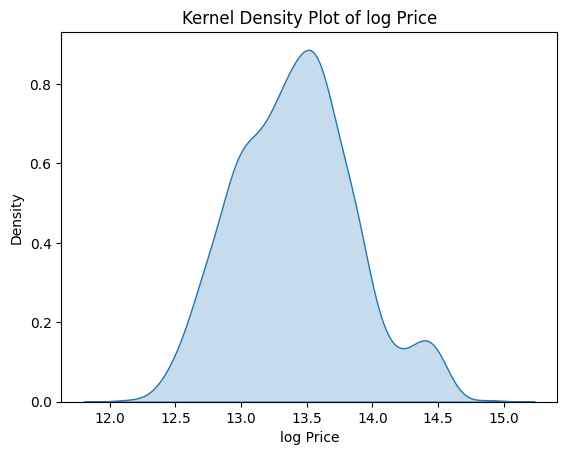

               Price                                                                            
               count       mean       std        min        25%        50%        75%        max
Make                                                                                            
Chevrolet        6.0  12.919895  0.480975  12.495004  12.568392  12.752286  13.171681  13.701221
Datsun           3.0  12.576047  0.036311  12.538967  12.558302  12.577636  12.594587  12.611538
Ford            52.0  13.468280  0.210895  12.577636  13.361380  13.469493  13.575984  13.879424
Honda           73.0  13.536318  0.336972  12.663497  13.272506  13.573439  13.726679  14.245343
Hyundai        305.0  13.368511  0.398781  12.421184  13.091904  13.366094  13.637579  14.370544
Jeep             4.0  14.216591  0.105084  14.070153  14.183270  14.240265  14.273586  14.315680
Kia              8.0  14.292177  0.076877  14.129591  14.272242  14.303105  14.349515  14.369970
MG Motors       35.0  14.43905

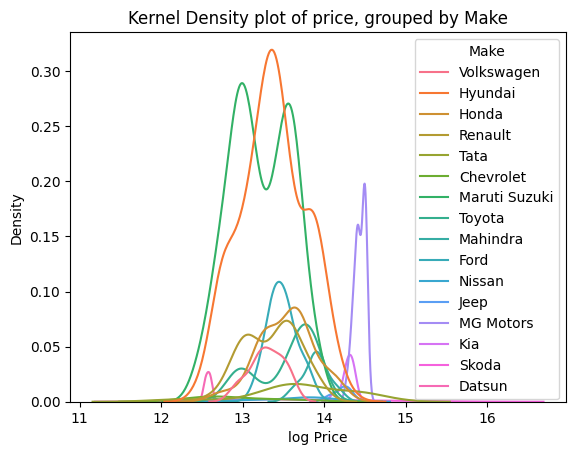

MG Motors is the most expensive car brand, followed by Kia, then Jeep.
Prices have a mean of 741,019
I am not sure what the units are as 700,000 is way to much for a car or used car; I assume that 7,000 us more accurate as the average in dollars


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print(df['Price'].describe().to_string())

sns.kdeplot(df['Price'], fill=True)
plt.title('Kernel Density Plot of log Price')
plt.xlabel('log Price')
plt.ylabel('Density')
plt.show()


print(df[['Make', 'Price']].groupby('Make').describe().to_string())

sns.kdeplot(x=df['Price'], hue=df['Make'])
plt.xlabel('log Price')
plt.ylabel('Density')
plt.title('Kernel Density plot of price, grouped by Make')
plt.show()

print("MG Motors is the most expensive car brand, followed by Kia, then Jeep.")
print("Prices have a mean of 741,019")
print("I am not sure what the units are as 700,000 is way to much for a car or used car; I assume that 7,000 us more accurate as the average in dollars")


3. Split the data into an 80% training set and a 20% testing set.

In [37]:
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.drop(columns=['Price'], axis=1)
X = X.drop(df.columns[0], axis=1) # drop first column with the 1, 2, 3, 4, 5 numbered rows

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) 

4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

In [38]:
from sklearn.linear_model import LinearRegression

print("Numeric variables: ")
X_train_numerical = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train_numerical = X_train[list(X_train_numerical)]

X_test_numerical = X_test.select_dtypes(include=['float64', 'int64']).columns
X_test_numerical = X_test[list(X_test_numerical)]

reg = LinearRegression(fit_intercept=False).fit(X_train_numerical,y_train)

y_hat = reg.predict(X_test_numerical)
print('R-squared for numerical columns: ', reg.score(X_test_numerical,y_test)) 
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE for numerical columns: ', rmse) 

print("\nCategorical variables: ")
X_combined = pd.concat([X_train, X_test])

X_feature_cols = X_combined.select_dtypes(include=['object']).columns
X_features = []
for col in list(X_feature_cols):
    X_features.append(pd.get_dummies(X_combined[col], dtype='int'))

X_features = pd.concat(X_features, axis=1)

X_train_feature = X_features.iloc[:X_train.shape[0]]
X_test_feature = X_features.iloc[X_train.shape[0]:]


reg = LinearRegression(fit_intercept=False).fit(X_train_feature,y_train)

y_hat = reg.predict(X_test_feature)
print('R-squared for categorical columns: ', reg.score(X_test_feature,y_test)) 
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE for categorical columns: ', rmse) 


print("\nAll variables: ")
X_train_all = pd.concat([X_train_numerical, X_train_feature], axis=1)
X_test_all = pd.concat([X_test_numerical, X_test_feature], axis=1)

reg = LinearRegression(fit_intercept=False).fit(X_train_all,y_train)

y_hat = reg.predict(X_test_all)
print('R-squared for all columns: ', reg.score(X_test_all,y_test)) 
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE for all columns: ', rmse) 

Numeric variables: 
R-squared for numerical columns:  0.06210848376571898
RMSE for numerical columns:  0.43017420602172907

Categorical variables: 
R-squared for categorical columns:  0.6824181368903475
RMSE for categorical columns:  0.2503202063657792

All variables: 
R-squared for all columns:  0.833300839157568
RMSE for all columns:  0.18135718615602936


The joint model performs significantly better, followed by the model using only categorical columns, and lastly the model using only numerical columns. 
The joint model achieved a better R-squared value (1 would be a "perfect model"):
- +.77 from the numerical-columns model 
- +.15 from the categorical-columns model

The joint model also achieved a lower RMSE calculation (0 would be a model with "no errors"):
- -0.25 from the numerical-columns model
- -0.07 from the categorical-columns model

5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?

In [47]:
from sklearn.preprocessing import PolynomialFeatures

for d in range(1,21):
    expander = PolynomialFeatures(degree=d, include_bias=False)
    
    X_train_poly = expander.fit_transform(X_train_numerical)
    X_test_poly = expander.fit_transform(X_test_numerical)
    
    X_train_poly = pd.DataFrame(X_train_poly).reset_index(drop=True)
    X_test_poly = pd.DataFrame(X_test_poly).reset_index(drop=True)

    X_train_feature = pd.DataFrame(X_train_feature).reset_index(drop=True)
    X_test_feature = pd.DataFrame(X_test_feature).reset_index(drop=True)

    X_train_poly_all = pd.concat([X_train_poly, X_train_feature], axis=1, ignore_index=True)
    X_test_poly_all = pd.concat([X_test_poly, X_test_feature], axis=1, ignore_index=True)

    reg = LinearRegression(fit_intercept=False).fit(X_train_poly_all, y_train)
    y_hat_temp = reg.predict(X_test_poly_all)
    
    r_squared = reg.score(X_test_poly_all, y_test)
    rmse = np.sqrt( np.mean( (y_test - y_hat_temp)**2 ))
    
    print(f'Degree: {d}, R^2: {r_squared}, RMSE: {rmse}')



Degree: 1, R^2: 0.833300839157568, RMSE: 0.18135718615602936
Degree: 2, R^2: 0.840393351209232, RMSE: 0.1774571700941648
Degree: 3, R^2: 0.8281197134482114, RMSE: 0.18415397456680088
Degree: 4, R^2: 0.8207286698713018, RMSE: 0.18807171397416242
Degree: 5, R^2: 0.46510559183601896, RMSE: 0.32486437667139373
Degree: 6, R^2: 0.46526426574052915, RMSE: 0.3248161883545094
Degree: 7, R^2: 0.4654205516743989, RMSE: 0.3247687182605869
Degree: 8, R^2: 0.4655748774794656, RMSE: 0.32472183672423194
Degree: 9, R^2: 0.4657272206991431, RMSE: 0.3246755508237903
Degree: 10, R^2: 0.4658775600132393, RMSE: 0.32462986729305204
Degree: 11, R^2: 0.46602587239984306, RMSE: 0.3245847933834781
Degree: 12, R^2: 0.4603626746962167, RMSE: 0.326301486754459
Degree: 13, R^2: 0.246535731376334, RMSE: 0.38556658859102133
Degree: 14, R^2: 0.46575447512219115, RMSE: 0.32466726951318364
Degree: 15, R^2: 0.46599229893525174, RMSE: 0.32459499730930186
Degree: 16, R^2: 0.46041710297193883, RMSE: 0.3262850308179418
Degree

As I increase the degree, the model gets better (has a better R^2 score and lower RMSE value) up to degree = 2, and then it gets worse from then on out. However, my model did not go into a negative R^2 score, indicating my model always performed better than a baseline mean prediction, even though it may be overfitting the data. The model with the polynomial feature of degree 2 performed slightly better than my previous model using both the numerical and categorical features, which was previously the best model.

6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

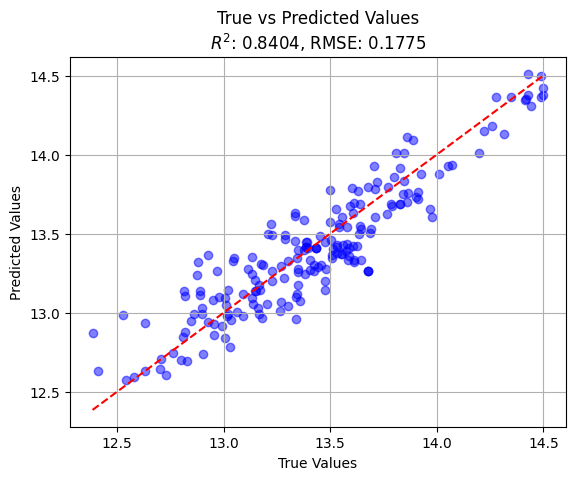

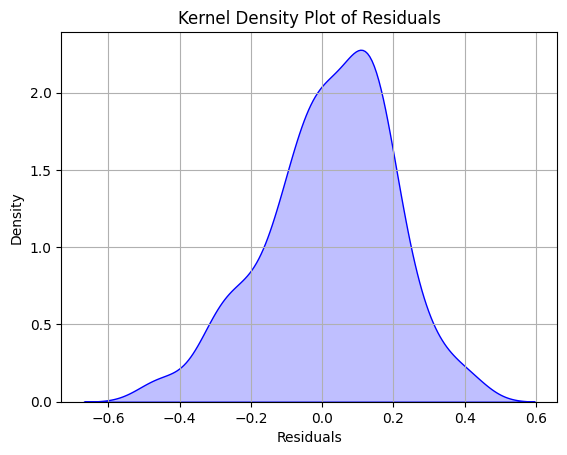

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

expander = PolynomialFeatures(degree=2, include_bias=False)
    
X_train_poly = expander.fit_transform(X_train_numerical)
X_test_poly = expander.fit_transform(X_test_numerical)

X_train_poly = pd.DataFrame(X_train_poly).reset_index(drop=True)
X_test_poly = pd.DataFrame(X_test_poly).reset_index(drop=True)

X_train_feature = pd.DataFrame(X_train_feature).reset_index(drop=True)
X_test_feature = pd.DataFrame(X_test_feature).reset_index(drop=True)

X_train_poly_all = pd.concat([X_train_poly, X_train_feature], axis=1, ignore_index=True)
X_test_poly_all = pd.concat([X_test_poly, X_test_feature], axis=1, ignore_index=True)

reg = LinearRegression(fit_intercept=False).fit(X_train_poly_all, y_train)
y_hat_temp = reg.predict(X_test_poly_all)

r_squared = reg.score(X_test_poly_all, y_test)
rmse = np.sqrt( np.mean( (y_test - y_hat_temp)**2 ))

plt.scatter(y_test, y_hat_temp, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'True vs Predicted Values\n$R^2$: {r_squared:.4f}, RMSE: {rmse:.4f}')
plt.grid()
plt.show()



residuals = y_test - y_hat_temp

sns.kdeplot(residuals, color='blue', fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Residuals')
plt.grid()
plt.show()

The residuals look roughly bell-shaped around zero. There doesn't look to be many outliers which is a strength of my model. It has a slight skew to the right though, which indicates there are more cases where the model under-predicts rather than over-predicts. This could be a systematic error or certain characteristics or feature values that are causing the model to struggle and produce consistently lower predictions than it should. 

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.

In [64]:
# oops started doing this but realized I didn't need to do more questions
import pandas as pd 
df = pd.read_csv("data/pretrial_data.csv")
df.isnull().sum()
df['is_poor'].value_counts(dropna=False)

is_poor
0.0    11500
1.0    10465
NaN     1021
Name: count, dtype: int64

2. Create a dummy variable indicating that the defendant is Black.

In [68]:
df['race'].value_counts()
df['Black'] = (df['race']=='B').astype(int)
df['held'] = df['held_wo_bail'].astype(int)

3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?

In [69]:
from sklearn.linear_model import LinearRegression
y = df['held']
X = pd.DataFrame(df['Black'])
reg = LinearRegression(fit_intercept=False).fit(X,y)
sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
print('R-squared: ', reg.score(X, y))
sdf

R-squared:  -0.1567733405929428


,variable,slope
0,Black,0.302333


4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`

In [ ]:
y = df['held_wo_bail']
black_dummies = df['Black']
sex_dummies = pd.get_dummies(df['sex'], dtype='int')


**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?